##########################################################
#### File: RattanavilayThip_Project_Milestone_2<br>
#### Name: Thip Rattanavilay<br>
#### Date: 04/24/2021<br>
#### Course: DSC 540 - Assignment: Project: Milestone 2<br>
##########################################################

# Cleaning/Formatting Flat File Source

Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:

Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matching

# Latest Covid19 dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Pull in the flat file source
df_covid = pd.read_csv('corona_latest.csv')
df_covid.head()

,Unnamed: 0,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,0,USA,560433,133,22115.0,10.0,32634.0,505684,11766.0,1693.0,67.0,2833112.0,8559.0
1,1,Spain,166831,0,17209.0,0.0,62391.0,87231,7371.0,3568.0,368.0,600000.0,12833.0
2,2,Italy,156363,0,19899.0,0.0,34211.0,102253,3343.0,2586.0,329.0,1010193.0,16708.0
3,3,France,132591,0,14393.0,0.0,27186.0,91012,6845.0,2031.0,221.0,333807.0,5114.0
4,4,Germany,127854,0,3022.0,0.0,64300.0,60532,4895.0,1526.0,36.0,1317887.0,15730.0


In [3]:
#Transformation 1 - I'm going to remove the Unnamed column as it's currently adding no value to the rest of the data
#Had troubles dropping at first because I didn't have the full column name right so I iterated over the column 
# names to get a list of them

for col in df_covid.columns: 
    print(col) 
#After getting the correct names I was able to successfully drop the column name that wasn't needed
df_covid = df_covid.drop(columns = ['Unnamed: 0'])
df_covid.head()

Unnamed: 0
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/ 1M pop


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,USA,560433,133,22115.0,10.0,32634.0,505684,11766.0,1693.0,67.0,2833112.0,8559.0
1,Spain,166831,0,17209.0,0.0,62391.0,87231,7371.0,3568.0,368.0,600000.0,12833.0
2,Italy,156363,0,19899.0,0.0,34211.0,102253,3343.0,2586.0,329.0,1010193.0,16708.0
3,France,132591,0,14393.0,0.0,27186.0,91012,6845.0,2031.0,221.0,333807.0,5114.0
4,Germany,127854,0,3022.0,0.0,64300.0,60532,4895.0,1526.0,36.0,1317887.0,15730.0


In [4]:
#Currently it looks like my dataframe is ordered by number of new cases. I think to be less biased regarding the data I'd want to sort it by country in alphabetic order
df_covid.sort_values(['Country,Other'], axis = 0, ascending = True, inplace = True)
df_covid.head()
#Now my dataframe is sorted alphabetically by country instead of looking at newest cases

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
85,Afghanistan,607,0,19.0,1.0,32.0,556,0.0,16.0,0.50,0.0,0.0
93,Albania,446,0,23.0,0.0,217.0,206,7.0,155.0,8.00,3877.0,1347.0
54,Algeria,1914,0,293.0,0.0,591.0,1030,60.0,44.0,7.00,3359.0,77.0
81,Andorra,638,0,29.0,0.0,128.0,481,17.0,8257.0,375.00,1673.0,21653.0
167,Angola,19,0,2.0,0.0,4.0,13,0.0,0.6,0.06,0.0,0.0


In [5]:
#Need to reset the index as my values are listed out how they were originally. For example, 85 for Afghanistan
df_covid = df_covid.reset_index(drop = True)
df_covid.head()
#Now my rows are ordered by country instead of new cases like before.

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,Afghanistan,607,0,19.0,1.0,32.0,556,0.0,16.0,0.50,0.0,0.0
1,Albania,446,0,23.0,0.0,217.0,206,7.0,155.0,8.00,3877.0,1347.0
2,Algeria,1914,0,293.0,0.0,591.0,1030,60.0,44.0,7.00,3359.0,77.0
3,Andorra,638,0,29.0,0.0,128.0,481,17.0,8257.0,375.00,1673.0,21653.0
4,Angola,19,0,2.0,0.0,4.0,13,0.0,0.6,0.06,0.0,0.0


In [6]:
#Now I'm going to hope there are no duplicates here, but I want to check just in case because that could easily inflate numbers per country.
for c in df_covid.columns:
    dup = df_covid[c].duplicated().sum()
    if dup>0:
        print("{} has {} duplicate value(s)".format(c,dup))
    else:
        print("{} has no duplicate values".format(c))
        
#Now I'm not worried about my columns that contain integers having duplicate values it's really the Country,Other column that was the biggest issue. However, I thought the exercise was valuable enough to do to all for practice.

Country,Other has no duplicate values
TotalCases has 39 duplicate value(s)
NewCases has 188 duplicate value(s)
TotalDeaths has 132 duplicate value(s)
NewDeaths has 204 duplicate value(s)
TotalRecovered has 84 duplicate value(s)
ActiveCases has 44 duplicate value(s)
Serious,Critical has 140 duplicate value(s)
Tot Cases/1M pop has 55 duplicate value(s)
Deaths/1M pop has 154 duplicate value(s)
TotalTests has 54 duplicate value(s)
Tests/ 1M pop has 55 duplicate value(s)


In [7]:
#I want to check for NaN values as this can easily have an effect on data when doing analysis. I can use similar code from above to check through all columns.
for c in df_covid.columns:
    miss = df_covid[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))
#None of my columns contain missing data which is great.

Country,Other has no missing values
TotalCases has no missing values
NewCases has no missing values
TotalDeaths has no missing values
NewDeaths has no missing values
TotalRecovered has no missing values
ActiveCases has no missing values
Serious,Critical has no missing values
Tot Cases/1M pop has no missing values
Deaths/1M pop has no missing values
TotalTests has no missing values
Tests/ 1M pop has no missing values


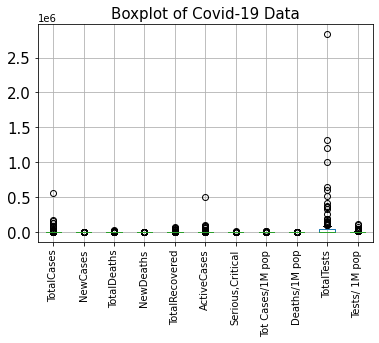

In [8]:
#Visual look for outliers using boxplot.
df_covid.plot.box()
plt.title("Boxplot of Covid-19 Data", fontsize = 15)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize = 15)
plt.grid(True)
#Looking at this I'll need to evaluate TotalTests as that contains obvious outliers. Knowing this data though and what it's covering I wouldn't doubt that this could easily contain accurate outliers as some country's have a lower population and have had better testing overall.


In [9]:
df_covid.to_csv('covid_clean_data1.csv')

# Vaccination dataset 

In [10]:
#Load data
vaccine_data = pd.read_csv('country_vaccinations.csv')

In [11]:
#See how the data look like
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [12]:
#See the latest date of the data
vaccine_data['date'].max()

'2021-04-02'

In [13]:
#Understand a big picture of data
vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5.688000e+03,5.091000e+03,3.551000e+03,4.748000e+03,9.285000e+03,5688.000000,5091.000000,3551.000000,9285.000000
mean,3.176061e+06,2.367437e+06,1.053113e+06,1.106803e+05,6.660192e+04,11.365188,8.457209,4.120817,2827.347119
std,1.181939e+07,7.980747e+06,4.272632e+06,3.991290e+05,2.630405e+05,19.582268,12.977373,8.725780,4964.726524
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.538375e+04,4.150600e+04,1.962800e+04,2.942750e+03,9.700000e+02,0.870000,0.860000,0.420000,361.000000
50%,3.071805e+05,2.691020e+05,1.236860e+05,1.453450e+04,5.913000e+03,4.290000,3.490000,1.580000,1395.000000
75%,1.495076e+06,1.136175e+06,5.389345e+05,6.027850e+04,2.792100e+04,13.032500,9.825000,3.845000,3463.000000
max,1.576065e+08,1.018048e+08,5.798478e+07,7.185000e+06,5.190143e+06,180.780000,95.850000,84.930000,118759.000000


In [14]:
#See counties
list(vaccine_data['country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Faeroe Islands',
 'Falkland Islands',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Ka

In [15]:
# How many countries are in the table?
len(list(vaccine_data['country'].unique()))

162

## Cleaning Vaccination data

In [16]:
def process_data(country_column, vaccine_column):
    """
    
    Processing Data Function: to select interesting data from main table
    Then, clean the data and provide with DataFrame format
    
    Parameters:
    country_column (str) : country column name ('country', OR 'iso_code')
    
    Return:
    (DataFrame) vaccine data by country (column) and date (row)
    
    """
    
    #Select interesting data from main tables such as country, date, and people_fully_vaccinated_per_hundred
    data_processed = vaccine_data[[country_column, 'date', vaccine_column]]

    #Transpose data row (country) to column
    data_processed = data_processed.pivot(index = 'date', 
                                                    columns = country_column, 
                                                    values = vaccine_column)

    #Remove columns (country) with all NULL data
    #Because some countries do not have any data.
    #No need to analyse/visualise countries that do not have any data.
    data_processed = data_processed.dropna(how='all', axis=1)

    #Fill NULL data with previous value
    #Fill the vaccine (NULL) data with the data from previous date
    data_processed = data_processed.fillna(method='ffill')
    
    return data_processed

In [17]:
# print process data

print(process_data.__doc__)


    
    Processing Data Function: to select interesting data from main table
    Then, clean the data and provide with DataFrame format
    
    Parameters:
    country_column (str) : country column name ('country', OR 'iso_code')
    
    Return:
    (DataFrame) vaccine data by country (column) and date (row)
    
    


In [18]:
#Call and clean people_fully_vaccinated_per_hundred data from main table
vaccined_percentage = process_data('country', 'people_fully_vaccinated_per_hundred')

In [19]:
# analyse data
def selected_data(threshold, data_table):
    """
    To filter only country having data more than or equal to threshold
    
    Parameters:
    threshold (int): threshold of the data to see (above threshold)
    data_table (DataFrame): data table to filter
    
    Return:
    DataFrame: Selected data
    
    """
    
    country_exceed_threshold = []
    
    for country in list(data_table.columns):
        if data_table[country].iloc[-1] >= threshold:
            country_exceed_threshold.append(country)
            
    return data_table[country_exceed_threshold]

In [20]:
print(selected_data.__doc__)


    To filter only country having data more than or equal to threshold
    
    Parameters:
    threshold (int): threshold of the data to see (above threshold)
    data_table (DataFrame): data table to filter
    
    Return:
    DataFrame: Selected data
    
    


In [21]:
#Select data by the counties with having more than 20% of population getting full doses of Covid-19 Vaccine
vaccined_percentage_selected = selected_data(20, vaccined_percentage)

In [22]:
#print vaccined percentage
vaccined_percentage_selected

country,Bermuda,Cayman Islands,Chile,Gibraltar,Israel,Monaco,Seychelles,United Arab Emirates
date,,,,,,,,
2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-03-29,24.68,27.33,17.67,82.97,54.82,21.23,33.95,22.12
2021-03-30,24.68,27.33,18.42,82.97,55.08,21.23,37.49,22.12
2021-03-31,24.68,29.04,19.22,84.57,55.30,21.23,37.49,22.12


In [23]:
vaccined_percentage_selected.to_csv('vaccine_clean_data_1.csv')